## Gold Price Prediction using Linear Regression, Neural Networks and Decision Trees


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## Checking coorelation 

In [3]:
df = df.drop('Date',axis = 1)

In [4]:
correlation = df.corr()

In [5]:
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/var/folders/k9/f320kf1n3711yfpwdgh8bsvr0000gn/T/ipykernel_99561/3459193413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"],color = 'green')
/opt/anaconda3/envs/notebook-7.0.6/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

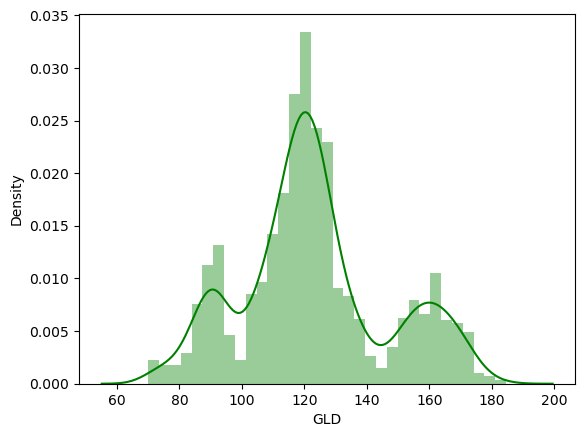

In [6]:
sns.distplot(df["GLD"],color = 'green')

In [7]:
X = df.drop('GLD',axis = 1)
Y = df['GLD']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   USO      2290 non-null   float64
 2   SLV      2290 non-null   float64
 3   EUR/USD  2290 non-null   float64
dtypes: float64(4)
memory usage: 71.7 KB


## Training the model 

In [8]:
scaler = StandardScaler()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=3)

In [9]:
X_train_scl = scaler.fit_transform(X_train)
X_train_scl.shape

(1832, 4)

### Using SGDRegressor

In [10]:
sgdr = SGDRegressor(max_iter = 1000)

In [11]:
sgdr.fit(X_train_scl,Y_train)

SGDRegressor()

In [12]:
pred_reg = sgdr.predict(X_train_scl)


In [13]:
print(mean_absolute_error(pred_reg,Y_train))

6.016334834579395


In [14]:
X_test_scl = scaler.transform(X_test)

In [15]:
pred_reg_test = sgdr.predict(X_test_scl)

In [16]:
print(mean_absolute_error(pred_reg_test,Y_test))

6.2362306709742725


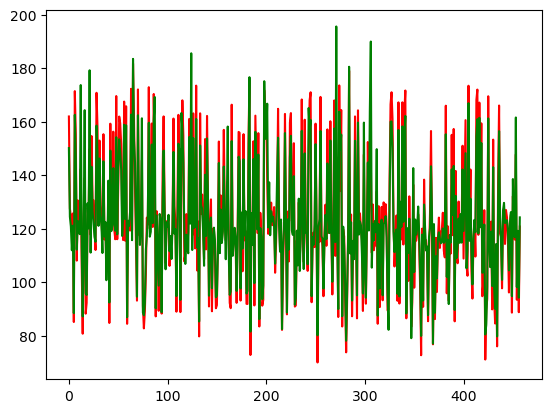

In [17]:
Y_test =list(Y_test)
plt.plot(Y_test,color = 'red')
plt.plot(pred_reg_test,color = 'green')

# Mean absolute error of somewhere about 6.24 dollars from the actual price 

## Neural Networks

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
NN = Sequential([
    Dense(units = 4,activation = "relu"),
    Dense(units = 4,activation = 'relu'),
    Dense(units = 2,activation = 'relu'),
    Dense(units = 1,activation = 'linear')
])

In [20]:
NN.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mean_absolute_error','mean_squared_error'])

In [21]:
NN.fit(X_train_scl,Y_train,epochs = 100)

Epoch 1/100


2024-06-19 11:23:35.470285: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


58/58 [==============================] - 0s 624us/step - loss: 15539.7148 - mean_absolute_error: 122.5297 - mean_squared_error: 15539.7148
Epoch 2/100
58/58 [==============================] - 0s 558us/step - loss: 15477.6963 - mean_absolute_error: 122.2689 - mean_squared_error: 15477.6963
Epoch 3/100
58/58 [==============================] - 0s 556us/step - loss: 15367.4834 - mean_absolute_error: 121.8056 - mean_squared_error: 15367.4834
Epoch 4/100
58/58 [==============================] - 0s 543us/step - loss: 15132.9033 - mean_absolute_error: 120.8115 - mean_squared_error: 15132.9033
Epoch 5/100
58/58 [==============================] - 0s 535us/step - loss: 14734.0400 - mean_absolute_error: 119.0794 - mean_squared_error: 14734.0400
Epoch 6/100
58/58 [==============================] - 0s 533us/step - loss: 14120.3467 - mean_absolute_error: 116.3179 - mean_squared_error: 14120.3467
Epoch 7/100
58/58 [==============================] - 0s 521us/step - loss: 13272.4756 - mean_absolute_erro

In [22]:
pred_y_NN = NN.predict(X_test_scl) 

15/15 [==============================] - 0s 502us/step


In [23]:
print(mean_absolute_error(pred_y_NN,Y_test))

4.401252929054228


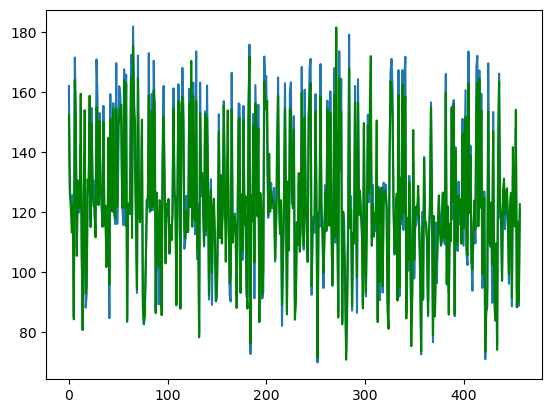

In [24]:
plt.plot(Y_test)
plt.plot(pred_y_NN,color = 'green')

#### Using Neural Networks we got the Mean Absolute Error to be somewhere around 7.14 dollars from the actual price

## Moving on too Decision Trees 

## Using XGBoost, Basically builds a number of trees each improving on the other 

In [25]:
from xgboost import XGBRegressor

In [26]:
boost_tree = XGBRegressor(n_estimators = 100)## estimators refers to the amount of trees to be built

In [27]:
boost_tree.fit(X_train_scl,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
pred_y_tree = boost_tree.predict(X_test_scl)

In [29]:
print(mean_absolute_error(pred_y_tree,Y_test))

1.6344542829312652


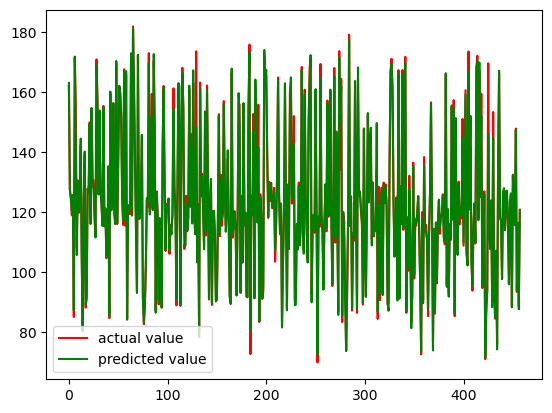

In [30]:
plt.plot(Y_test,color = 'red',label = 'actual value')
plt.plot(pred_y_tree,color='green',label = 'predicted value')
plt.legend()
plt.show()

## Mean absolute error is about 1.63 dollars from the actual value, which ends up giving a pretty good model

## Using the Random Forest algorithm creating a new model

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
random_forest = RandomForestRegressor(n_estimators = 100)

In [33]:
random_forest.fit(X_train_scl,Y_train)


RandomForestRegressor()

In [39]:
pred_y_rando_train = random_forest.predict(X_train_scl)

In [34]:
pred_y_randomforest = random_forest.predict(X_test_scl)

In [35]:
print(mean_absolute_error(pred_y_randomforest,Y_test))

1.348491643624454


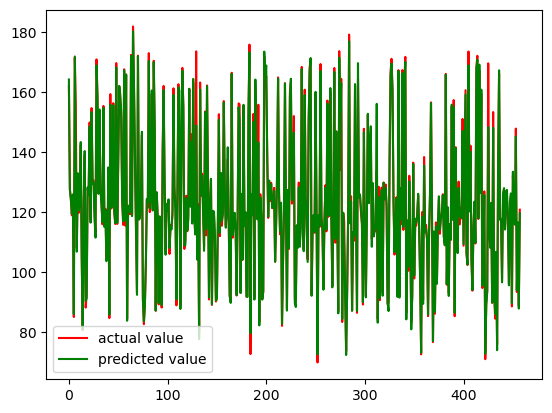

In [36]:
plt.plot(Y_test,color = 'red',label = 'actual value')
plt.plot(pred_y_randomforest ,color ="green",label = 'predicted value')
plt.legend()
plt.show()

# Random Forest seems to be the best algorithm, as it has a mean absolute error of only 1.39 dollars from the actual value 